In [2]:
!ls /Volumes/clmnlab/GA/regressors/reg_onset_displacement/disp_14sensors_1sec/GA

GA01_disp_1sec_r01_s01.txt GA26_disp_1sec_r01_s01.txt
GA01_disp_1sec_r01_s02.txt GA26_disp_1sec_r01_s02.txt
GA01_disp_1sec_r01_s03.txt GA26_disp_1sec_r01_s03.txt
GA01_disp_1sec_r01_s04.txt GA26_disp_1sec_r01_s04.txt
GA01_disp_1sec_r01_s05.txt GA26_disp_1sec_r01_s05.txt
GA01_disp_1sec_r01_s06.txt GA26_disp_1sec_r01_s06.txt
GA01_disp_1sec_r01_s07.txt GA26_disp_1sec_r01_s07.txt
GA01_disp_1sec_r01_s08.txt GA26_disp_1sec_r01_s08.txt
GA01_disp_1sec_r01_s09.txt GA26_disp_1sec_r01_s09.txt
GA01_disp_1sec_r01_s10.txt GA26_disp_1sec_r01_s10.txt
GA01_disp_1sec_r01_s11.txt GA26_disp_1sec_r01_s11.txt
GA01_disp_1sec_r01_s12.txt GA26_disp_1sec_r01_s12.txt
GA01_disp_1sec_r01_s13.txt GA26_disp_1sec_r01_s13.txt
GA01_disp_1sec_r01_s14.txt GA26_disp_1sec_r01_s14.txt
GA01_disp_1sec_r02_s01.txt GA26_disp_1sec_r02_s01.txt
GA01_disp_1sec_r02_s02.txt GA26_disp_1sec_r02_s02.txt
GA01_disp_1sec_r02_s03.txt GA26_disp_1sec_r02_s03.txt
GA01_disp_1sec_r02_s04.txt GA26_disp_1sec_r02_s04.txt
GA01_disp_1sec_r02_s05.txt G

In [3]:
import glob

file_list = glob.glob('/Volumes/clmnlab/GA/regressors/reg_onset_displacement/disp_14sensors_1sec/G*/G*_disp_1sec_r*_s*.txt')
len(file_list)

6706

In [4]:
subj_list = sorted(set([f.split('/')[-1][:4] for f in file_list]))
print(subj_list)

['GA01', 'GA02', 'GA05', 'GA07', 'GA08', 'GA11', 'GA12', 'GA13', 'GA14', 'GA15', 'GA18', 'GA19', 'GA20', 'GA21', 'GA23', 'GA26', 'GA27', 'GA28', 'GA29', 'GA30', 'GA31', 'GA32', 'GA33', 'GA34', 'GA35', 'GA36', 'GA37', 'GA38', 'GA42', 'GA44', 'GB01', 'GB02', 'GB05', 'GB07', 'GB08', 'GB11', 'GB12', 'GB13', 'GB14', 'GB15', 'GB18', 'GB19', 'GB20', 'GB21', 'GB23', 'GB26', 'GB27', 'GB28', 'GB29', 'GB30', 'GB31', 'GB32', 'GB33', 'GB34', 'GB35', 'GB36', 'GB37', 'GB38', 'GB42', 'GB44', 'GC01', 'GC02', 'GC05', 'GC07', 'GC08', 'GC11', 'GC12', 'GC14', 'GC15', 'GC19', 'GC20', 'GC23', 'GC26', 'GC29', 'GC30', 'GC31', 'GC32', 'GC33', 'GC34', 'GC35']


In [5]:
disp_data = {}

for fname in file_list:
    with open(fname, 'r') as file:
        disps = file.readline()
    disps = [float(a) for a in disps.split()]
    
    disp_data[fname.split('/')[-1]] = disps
    
#    plt.plot(np.arange(len(disps)), disps)
#    plt.show()

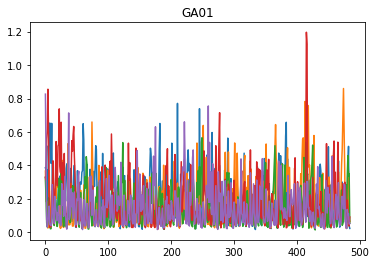

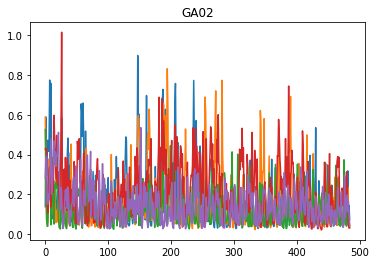

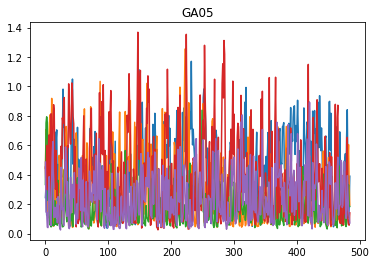

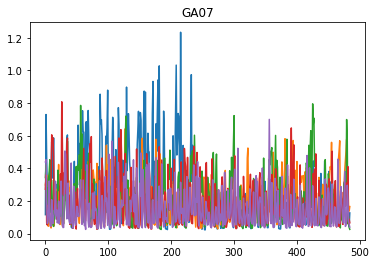

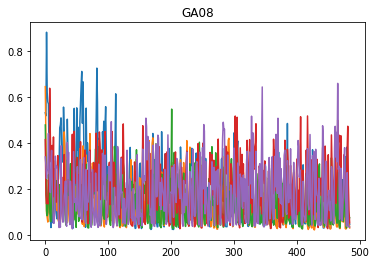

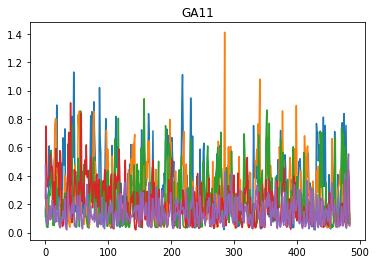

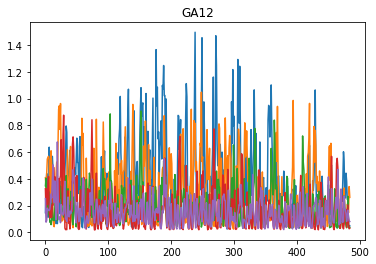

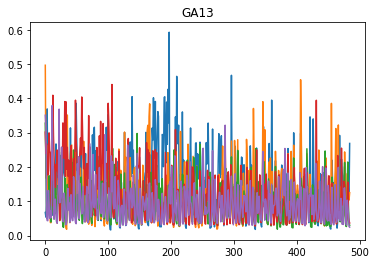

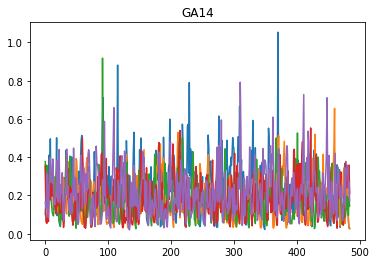

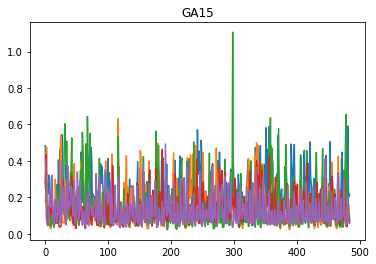

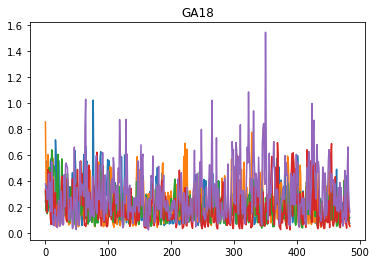

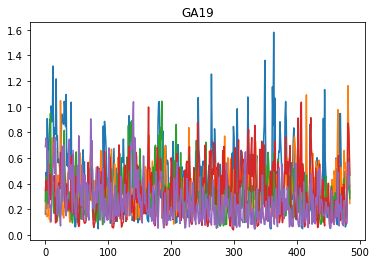

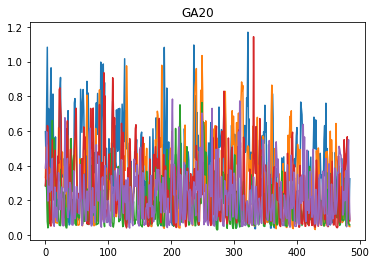

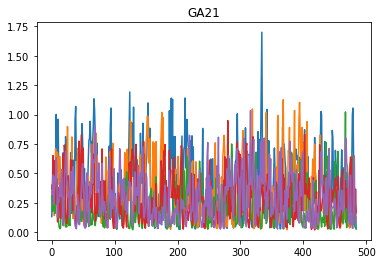

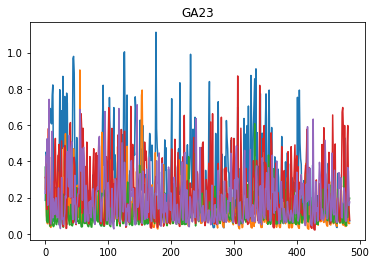

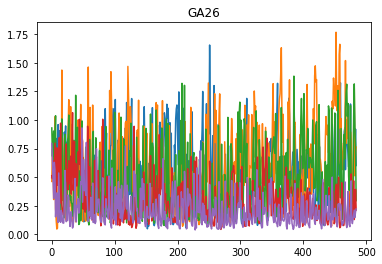

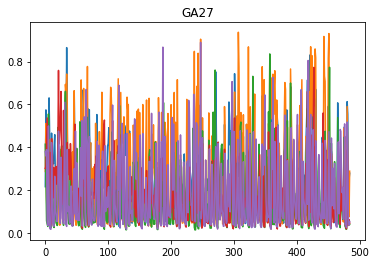

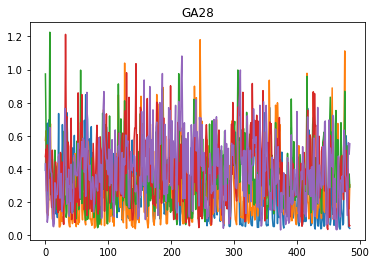

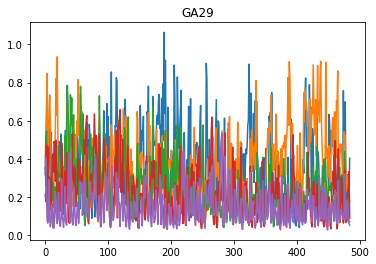

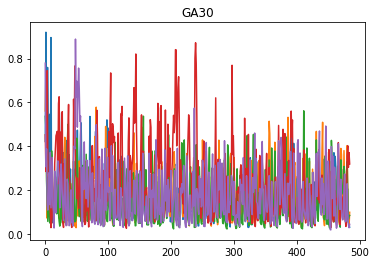

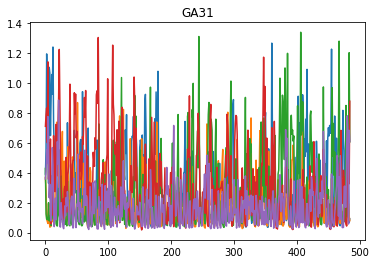

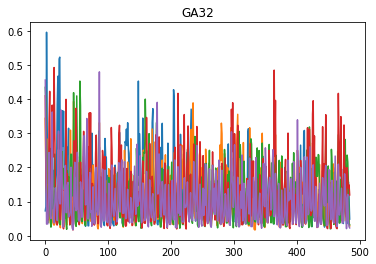

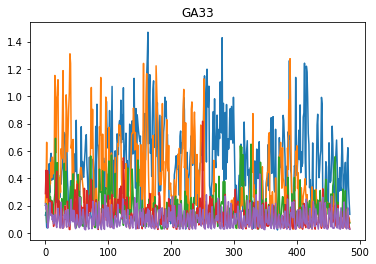

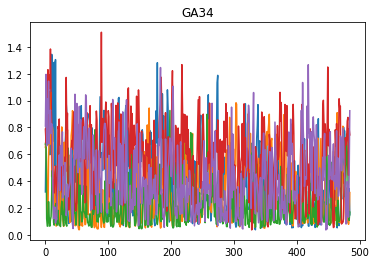

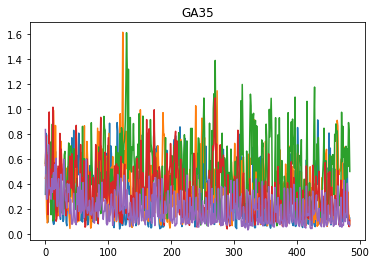

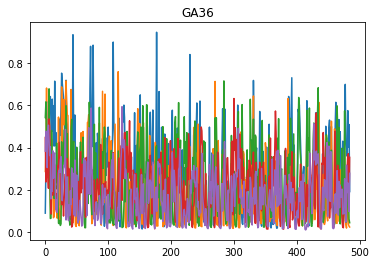

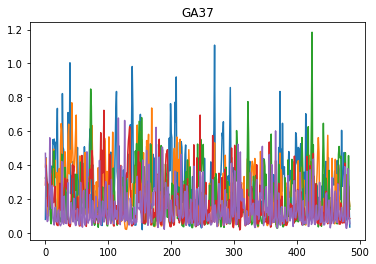

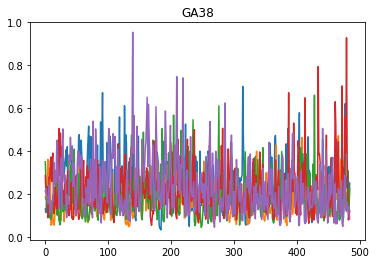

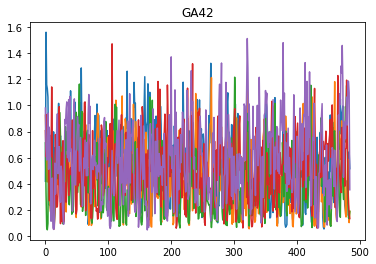

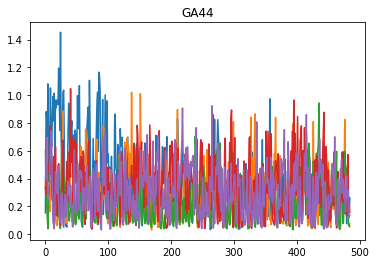

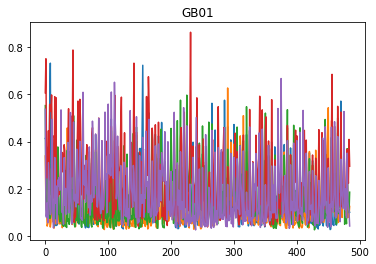

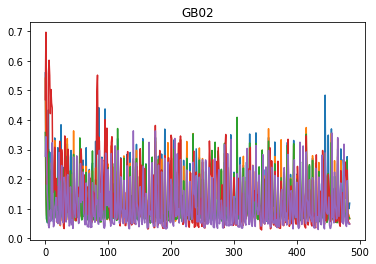

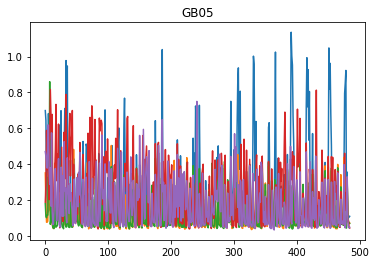

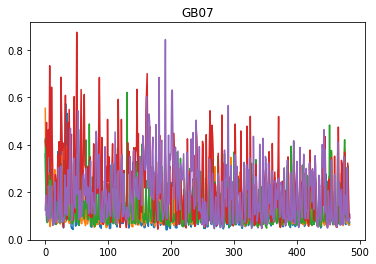

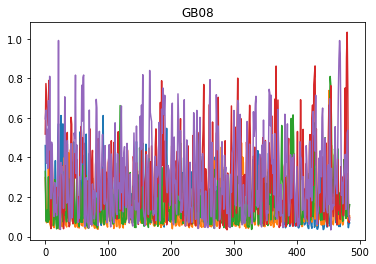

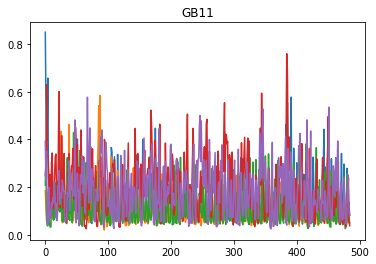

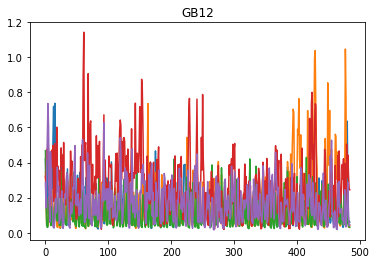

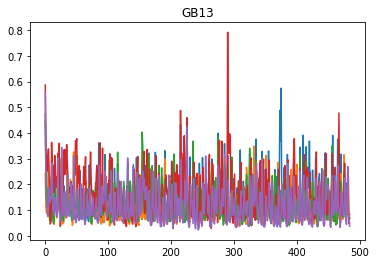

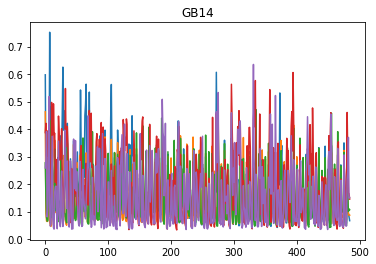

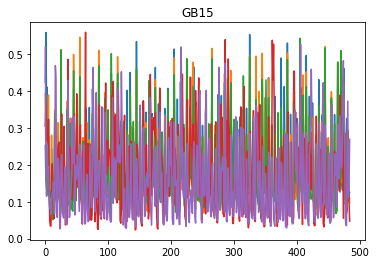

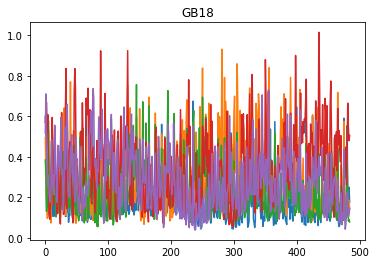

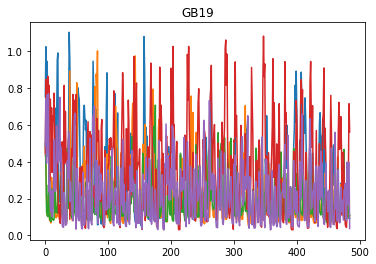

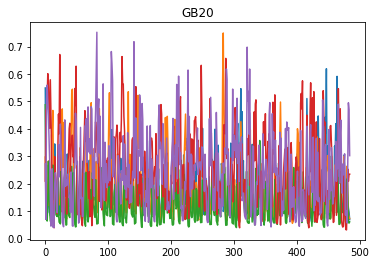

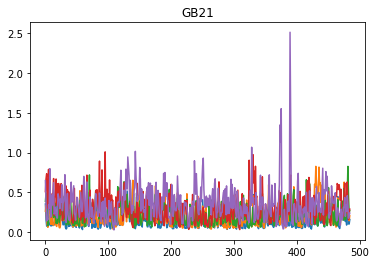

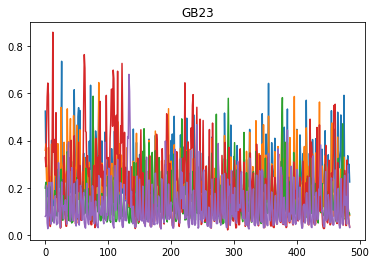

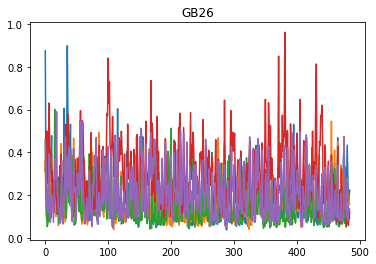

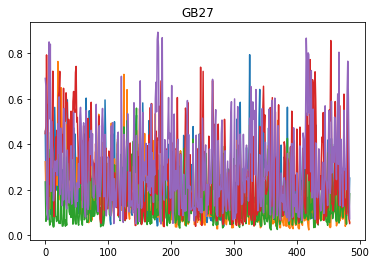

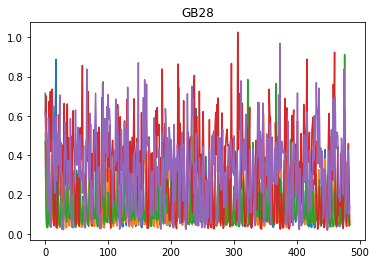

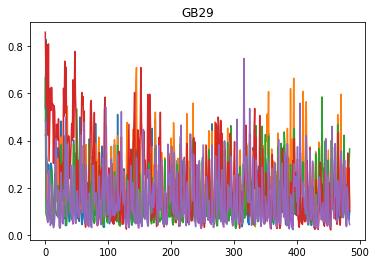

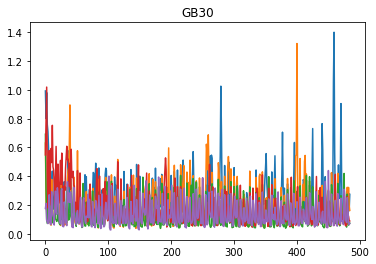

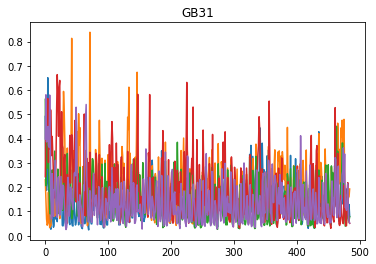

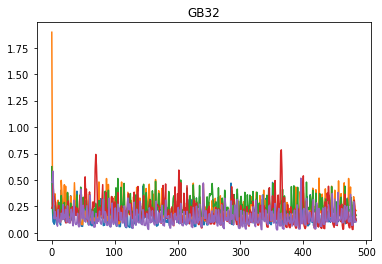

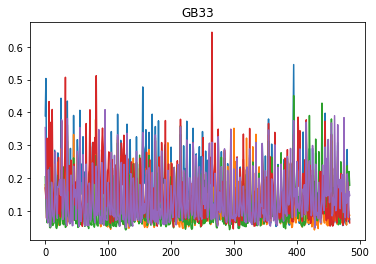

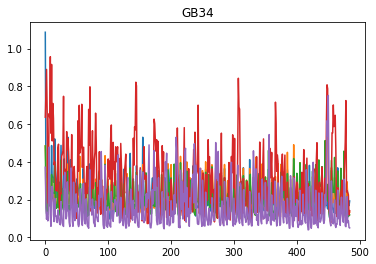

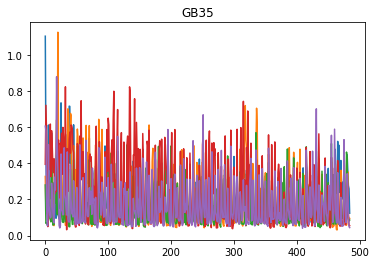

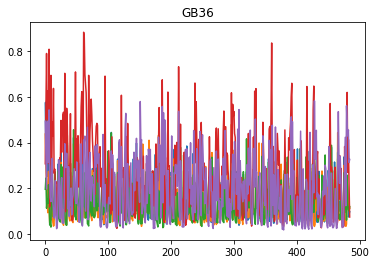

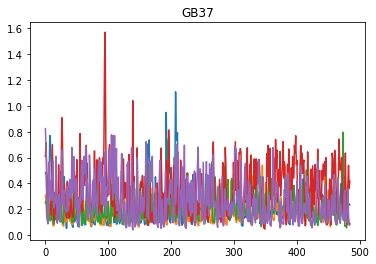

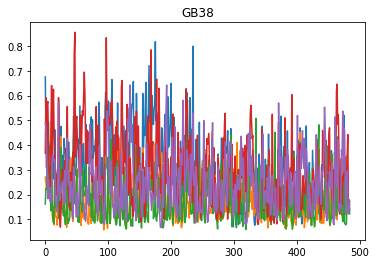

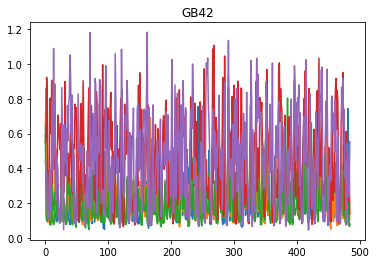

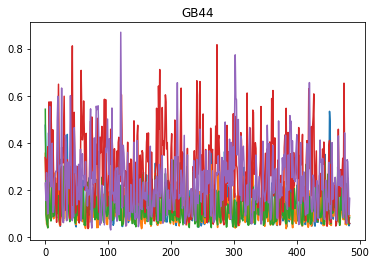

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

for subj in subj_list:
    if 'C' in subj:
        continue
        
    for run in np.arange(1, 6):
        avg_disp = []
        for s_id in range(1, 15):
            disps = disp_data['%s_disp_1sec_r%02d_s%02d.txt' % (subj, run, s_id)]
            avg_disp.append(disps)
            
        avg_disp = np.mean(avg_disp, axis=0)
        
        plt.plot(np.arange(len(avg_disp)), avg_disp)
    plt.title('%s' % (subj))
    plt.show()

In [7]:
import scipy.io

mat = scipy.io.loadmat('/Volumes/clmnlab/GA/behavior_data/GA01/GA01-fmri.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'AccRatio', 'FeedbackTime', 'InsideTimeOut', 'Llog', 'Lpath', 'MaxTrials', 'MovementTimeOut', 'PosTarget', 'PreparationTime', 'RetTrials', 'TaskAngle', 'TaskColor', 'TaskPos', 'TitleDisplayTime', 'Tlog', 'TotalLearnTrialTime', 'TotalTrials', 'Tpath', 'cm2px', 'diacm', 'diameter', 'distcm', 'isflipped', 'nTask', 'xFrame', 'yFrame', 'subjID', 'testType', 'nTrialperRun', 'nRun', 'nTrial', 'LogDir', 'Clog', 'K', 'weight', 'sumw', 'Gx', 'Gy', 'X0', 'Y0', 'res', 'fontSize', 'key', 't0', 'glove', 'allData', 'cnt', 'LearnTrialStartTime', 'data', 'rate', 'CaliDuration', 'mData', 'U', 'S', 'A', 'Uk', 'chSign', 'strSubj', 'k', 'dataTemp', 'XY', 'boxSize', 'pos', 'ID_reached', 'allXY', 'ID', 'mouseSize', 'mouseThick', 'PreDuration', 'T', 'nSampleTrial', 'nSample', 'fb', 'targetID', 'tpos', 'cnt_hit', 'idx', 'preData', '__function_workspace__'])

In [8]:
import numpy as np

distances = []

for i in range(mat['allXY'].shape[1]):     
    target_pos = mat['targetID'][0, i//300+8]
    
    if target_pos == 1:
        target_pos = (-160, 160)
    elif target_pos == 5:
        target_pos = (160, 160)
    elif target_pos == 21:
        target_pos = (-160, -160)
    elif target_pos == 25:
        target_pos = (160, -160)
    else:
        raise Exception
        
    x = mat['allXY'][0, i]
    y = mat['allXY'][1, i]
    
    distances.append(np.linalg.norm(np.array((target_pos[0]-x, target_pos[1]-y))))
 

In [9]:
import pandas as pd

distances = pd.DataFrame(distances)
distances.to_csv("/Users/jisu/Downloads/distances_jisu.csv")

In [10]:
np.mean(distances[:30])

0    184.899876
dtype: float64

In [11]:
mean_cur_pos = np.mean(mat['allXY'][:, :30], axis=1)
target_pos - mean_cur_pos
np.linalg.norm(target_pos - mean_cur_pos)

144.74067970546773

array([119.77415121,  81.26510361])

144.74067970546773

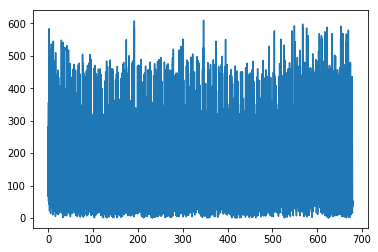

In [46]:
plt.plot(np.arange(len(distances))/300, distances)

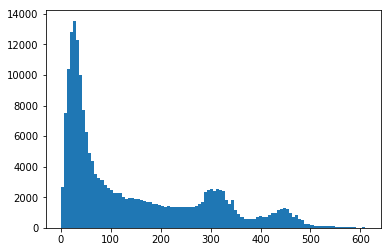

In [48]:
plt.hist(distances, bins=100)
plt.show()

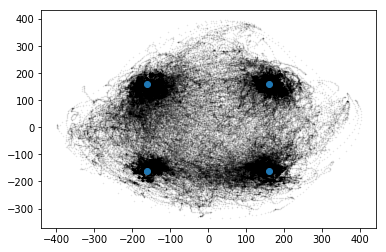

In [61]:
#plt.plot(mat['allXY'][0, :], mat['allXY'][1, :])
plt.scatter(mat['allXY'][0, :], mat['allXY'][1, :], s=1, c='k', marker='.', alpha=0.1)
plt.scatter([-160, -160, 160, 160], [-160, 160, -160, 160])

In [95]:
distances = []

for i in range(97*6):
    target_pos = mat['targetID'][0, i+8]
    
    if target_pos == 1:
        target_pos = (-160, 160)
    elif target_pos == 5:
        target_pos = (160, 160)
    elif target_pos == 21:
        target_pos = (-160, -160)
    elif target_pos == 25:
        target_pos = (160, -160)
    else:
        raise Exception
        
    xs = mat['allXY'][0, i*300:(i+1)*300]
    ys = mat['allXY'][1, i*300:(i+1)*300]
    
    ts = np.matlib.repmat(target_pos, 60, 1)
    
    dists = [((t[0]-x)**2+(t[1]-y)**2) ** 0.5 for t, x, y in zip(ts, xs, ys)]
    # 5 secs
    for j in range(5):
        distances.append(np.mean(dists[j*60:(j+1)*60]))

/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [116]:
subj_disp_data = []

for run in np.arange(1, 7):
    avg_disp = []
    for s_id in range(1, 15):
        disps = disp_data['%s_disp_1sec_r%02d_s%02d.txt' % ('GA01', run, s_id)]
        avg_disp.append(disps)

    avg_disp = np.mean(avg_disp, axis=0)
    subj_disp_data.extend(avg_disp)

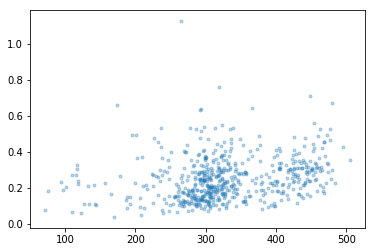

In [123]:
plt.scatter(distances[:-1], subj_disp_data[1:], alpha=0.3, marker='.')

In [92]:
import scipy.spatial.distance

dists = [((t[0]-x)**2+(t[1]-y)**2) ** 0.5 for t, x, y in zip(ts, xs, ys)]

In [5]:
dists

NameError: name 'dists' is not defined

In [ ]:
for subj in subj_list:
    if 'C' in subj:
        continue
    
    subj_disp_data = []
    subj_dist_data = []
    
    for run in np.arange(1, 6):
        avg_disp = []
        for s_id in range(1, 15):
            disps = disp_data['%s_disp_1sec_r%02d_s%02d.txt' % (subj, run, s_id)]
            avg_disp.append(disps)
            
        avg_disp = np.mean(avg_disp, axis=0)
        
        subj_disp_data.extend(avg_disp)
        
        